In [1]:
import tdmclient.notebook
#await tdmclient.notebook.start()

CancelledError: 

In [1]:

import cv2
import math

import numpy as np
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import size
from matplotlib import colors
#from asgiref.sync import sync_to_async #in order to load variables to communicate between sync and async



In [2]:
import optimal_path as op

from robot import Robot
from Map import Map
#from Local_navigation import* 
#from Mouvement import*
from vision import*
from optimal_path import* 


map_lenght = 1
nb_of_square_by_side = 50
current = 1

In [3]:
global move 
move = False #bool which indicate how our robot is moving (1: avoid an object VS 0: following the optimal path)
kalman_bool = False
#pourcentage_reduc = 1


George = Robot()
Lausanne = Map(map_lenght, nb_of_square_by_side)

#VideoCap = vision_initialization()
VideoCap=cv2.VideoCapture(1)


In [19]:
#############################
#Test MASK  A LANCER QUE POUR FAIRE DES TESTS SUR LE MASK
#############################

while True:
    ret, frame = VideoCap.read()
    mask = mask_map_init(frame)
    
    keyVal = cv2.waitKey(1) & 0xFF
    if keyVal == ord('q'):
        break
    cv2.imshow("mask",mask)


error: OpenCV(4.5.4) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


taille frame (1080, 1920, 3)
MAP INITIALISATION
goal (62, 20)
start position (80, 9)
Resized Dimensions :  (88, 50)
PATH COMPUTATION
PATH [[80 79 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62]
 [ 9 10 11 12 13 14 14 15 15 15 16 16 17 17 18 18 19 19 19 20]]
PATH22222 [[80 79 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62]
 [ 9 10 11 12 13 14 14 15 15 15 16 16 17 17 18 18 19 19 19 20]]


True

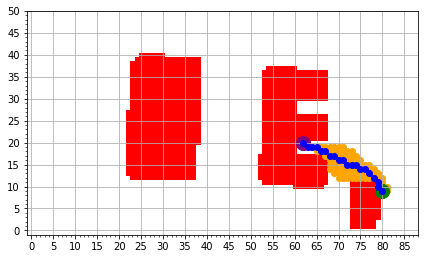

In [5]:
np.set_printoptions(threshold=sys.maxsize)
####################################
## INIT
####################################

# Prend une première image
ret, frame = VideoCap.read()
print("taille frame", frame.shape)

print("MAP INITIALISATION")
# Set the pourcentage value between the nb of pixel and nb of square by side
Lausanne.set_map_lenght(frame)
#print("Pourcentage",Lausanne.get_pourcentage())
# Set the robot goal, position and angle
goal = init_goal(frame, Lausanne.get_pourcentage())
#goal = (50, 40)
pos_robot = George.get_pos()
#print("GOAL", goal)


#pos_robot, angle = update(frame, Lausanne.get_pourcentage())  # fonction qui retourne la position angle etc....
 
      #Utiliser au cas où il ne trouve pas la bonne position du premier coup
while (pos_robot[0] <= 0) & (pos_robot[1] <= 0):
    #ret, frame=VideoCap.read()
    #display(frame,1,0,0)
    ret, frame=VideoCap.read()
    #vs.display (frame, 0, 1, 1, 0, 5, Lausanne.get_pourcentage())
    pos_robot, angle = update(frame, Lausanne.get_pourcentage())  # fonction qui retourne la position angle etc....
    #print("Waiting robot position") 
 

George.set_angle(angle)
George.set_goal(goal)
George.set_start_pos(pos_robot)
George.set_pos(pos_robot)
print ("goal", goal)
print ("start position", pos_robot)

# SET MAP
Lausanne.set_map_lenght(frame)
#print("Lausanna lenght", Lausanne.get_lenght())

# MASK 
mask = mask_map_init(frame)
#cv2.imshow("mask", mask)
cv2.imwrite("masque1.jpg", mask)

# Fin de l'init
Lausanne.init_grid(mask)
grille = Lausanne.get_map()
#cv2.imshow("grid", grille)
cv2.imwrite("grille.jpg", grille)

# OPTIMAL PATH
print("PATH COMPUTATION")
path, visitedNodes = op.path_computation(George.get_start() , George.get_goal() , Lausanne.get_lenght(), grille)

George.set_path(path) 
George.set_visit_nodes(visitedNodes) 

# Display the optimal path
op.display_map(Lausanne.get_lenght(),  grille,  George.get_visit_nodes(), George.get_path(), George.get_start(), George.get_goal())
print("PATH", George.get_path())

display (frame, 0, 1, 1, 1, George.get_path(), Lausanne.get_pourcentage())
print("PATH22222", George.get_path())
cv2.imwrite("TOTAL.jpg", frame)

#vision_end(VideoCap)



In [9]:
vision_end(VideoCap)

In [6]:

####################################
## while
####################################

George.set_current(0)
current= 0
kalman_bool = False
print("PATH", George.get_path())

print('START MOUVEMENT')
while True:#(George.get_pos() != George.get_goal()):
    
    # Read the camera
    ret, frame=VideoCap.read()
    
    # Recupere la position et angle --> XAV
    pos_robot,angle_robot = update(frame, Lausanne.get_pourcentage())
    George.set_pos(pos_robot)
    George.set_angle(angle_robot)
    
    if(current < George.get_path().shape[1]):
        current = path_update(pos_robot, 5, np.transpose(George.get_path())[current], George.get_current())
        George.set_current(current)
    else:
        print("ARRIVED")
        break
    
    #print("pos", pos_robot)
    #print("current", current)
    
    display (frame, 0, 1, 1, 1, path, Lausanne.get_pourcentage())
    
    # Quit when we press q
    keyVal = cv2.waitKey(1) & 0xFF
    if keyVal == ord('q'):
        break
     
    #sleep(0.1)


print("The End")
    

PATH [[80 79 79 78 77 76 75 74 73 72 71 70 69 68 67 66 65 64 63 62]
 [ 9 10 11 12 13 14 14 15 15 15 16 16 17 17 18 18 19 19 19 20]]
START MOUVEMENT
PATH [80  9]
X 0
Y 0
next goal plz
pos (80, 9)
current 1
PATH [79 10]
X 1
Y 1
next goal plz
pos (80, 9)
current 2
PATH [79 11]
X 1
Y 2
next goal plz
pos (80, 9)
current 3
PATH [78 12]
X 2
Y 3
next goal plz
pos (80, 9)
current 4
PATH [77 13]
X 3
Y 4
next goal plz
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76 14]
X 4
Y 5
pos (80, 9)
current 5
PATH [76

In [7]:
vision_end(VideoCap)